In [4]:
!pip install tensorflow opencv-python matplotlib
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
import shutil

from tensorflow import keras


# LOADING DATA & EXPLORING  IT

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
data_dir = '/content/drive/My Drive/Dogs_Races_Imgs/Images'



# Check if the directory exists
if os.path.exists('/content/drive/My Drive/Dogs_Races_Imgs/'):
    # Delete the entire "logs" directory and its contents
    shutil.rmtree('/content/drive/My Drive/Dogs_Races_Imgs/')
else:
    print(f"The directory {'/content/drive/My Drive/Dogs_Races_Imgs/'} does not exist.")



In [8]:
import tarfile

# Replace 'your_file.tar' with the actual filename
tar_file = "/content/drive/My Drive/images.tar"

# Open the tar file
with tarfile.open(tar_file, 'r') as tar:
    # Extract all the contents to a specific directory
    tar.extractall(path='/content/drive/My Drive/Dogs_Races_Imgs')


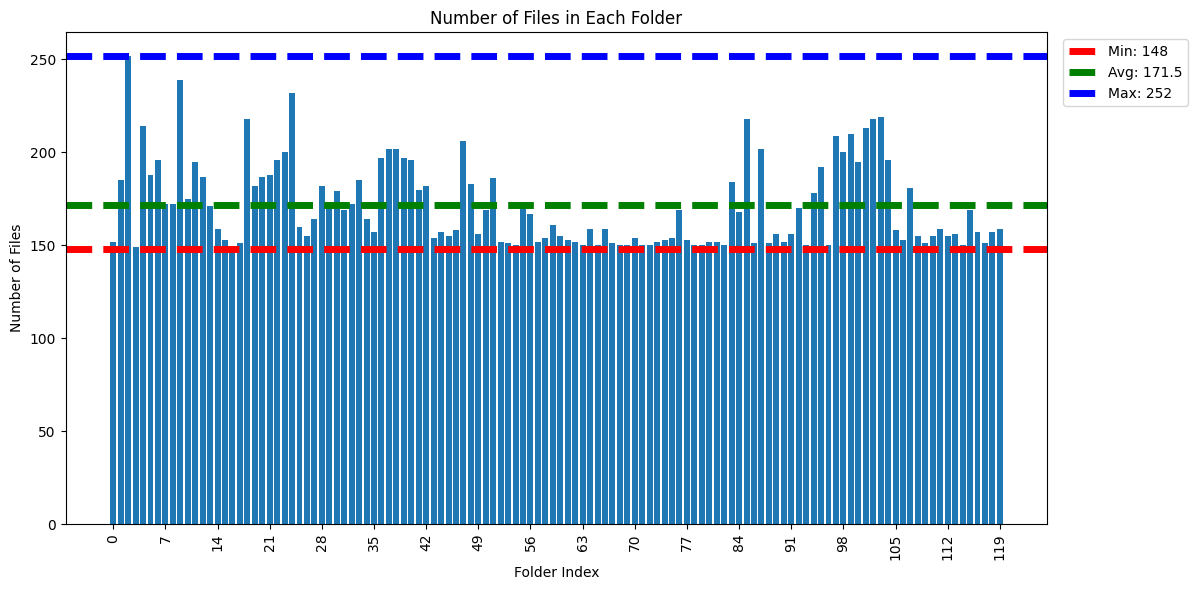

In [9]:
file_counts = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        file_count = len(os.listdir(folder_path))
        file_counts.append(file_count)

plt.figure(figsize=(12, 6))
plt.bar(range(len(file_counts)), file_counts)
plt.xlabel("Folder Index")
plt.ylabel("Number of Files")
plt.title("Number of Files in Each Folder")

# Create a custom set of X-axis ticks at intervals of 7
x_ticks = np.arange(0, len(file_counts), 7)
plt.xticks(x_ticks, rotation=90)

# Calculate and add horizontal bars for min, average, and max
min_file_count = min(file_counts)
avg_file_count = np.mean(file_counts)
max_file_count = max(file_counts)

line_width=5

plt.axhline(min_file_count, color='red', linestyle='--', linewidth=line_width, label=f"Min: {min_file_count}")
plt.axhline(avg_file_count, color='green', linestyle='--', linewidth=line_width, label=f"Avg: {avg_file_count}")
plt.axhline(max_file_count, color='blue', linestyle='--', linewidth=line_width, label=f"Max: {max_file_count}")

# Move the legend outside of the graph
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

In [10]:
import os


# Initialize an empty list to store the dog breed names
breed_names = []

# List all files in the folder
files = os.listdir(data_dir)

# Sort the list of files in the order they appear in the folder
files.sort()

# Iterate through the files and extract the dog breed names
for file_name in files:
    # Split the file name by the first "-"
    parts = file_name.split("-", 1)
    if len(parts) == 2:
        breed_name = parts[1].split(".")[0]  # Remove file extension
        breed_names.append(breed_name)

# Print the extracted breed names
print("Extracted Dog Breed Names:")
for breed in breed_names:
    print(breed)

# Check the number of elements in the array
print(f"Number of elements in the array: {len(breed_names)}")


Extracted Dog Breed Names:
Chihuahua
Japanese_spaniel
Maltese_dog
Pekinese
Shih-Tzu
Blenheim_spaniel
papillon
toy_terrier
Rhodesian_ridgeback
Afghan_hound
basset
beagle
bloodhound
bluetick
black-and-tan_coonhound
Walker_hound
English_foxhound
redbone
borzoi
Irish_wolfhound
Italian_greyhound
whippet
Ibizan_hound
Norwegian_elkhound
otterhound
Saluki
Scottish_deerhound
Weimaraner
Staffordshire_bullterrier
American_Staffordshire_terrier
Bedlington_terrier
Border_terrier
Kerry_blue_terrier
Irish_terrier
Norfolk_terrier
Norwich_terrier
Yorkshire_terrier
wire-haired_fox_terrier
Lakeland_terrier
Sealyham_terrier
Airedale
cairn
Australian_terrier
Dandie_Dinmont
Boston_bull
miniature_schnauzer
giant_schnauzer
standard_schnauzer
Scotch_terrier
Tibetan_terrier
silky_terrier
soft-coated_wheaten_terrier
West_Highland_white_terrier
Lhasa
flat-coated_retriever
curly-coated_retriever
golden_retriever
Labrador_retriever
Chesapeake_Bay_retriever
German_short-haired_pointer
vizsla
English_setter
Irish_set

In [11]:
# Load and preprocess the data
data_224 = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode='categorical', seed=123, image_size=(224, 224), batch_size=32)
data_299 = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode='categorical', seed=123, image_size=(299, 299), batch_size=32)


Found 20580 files belonging to 120 classes.
Found 20580 files belonging to 120 classes.


In [12]:
data_iterator_299 = data_299.as_numpy_iterator()
data_iterator_224 = data_224.as_numpy_iterator()


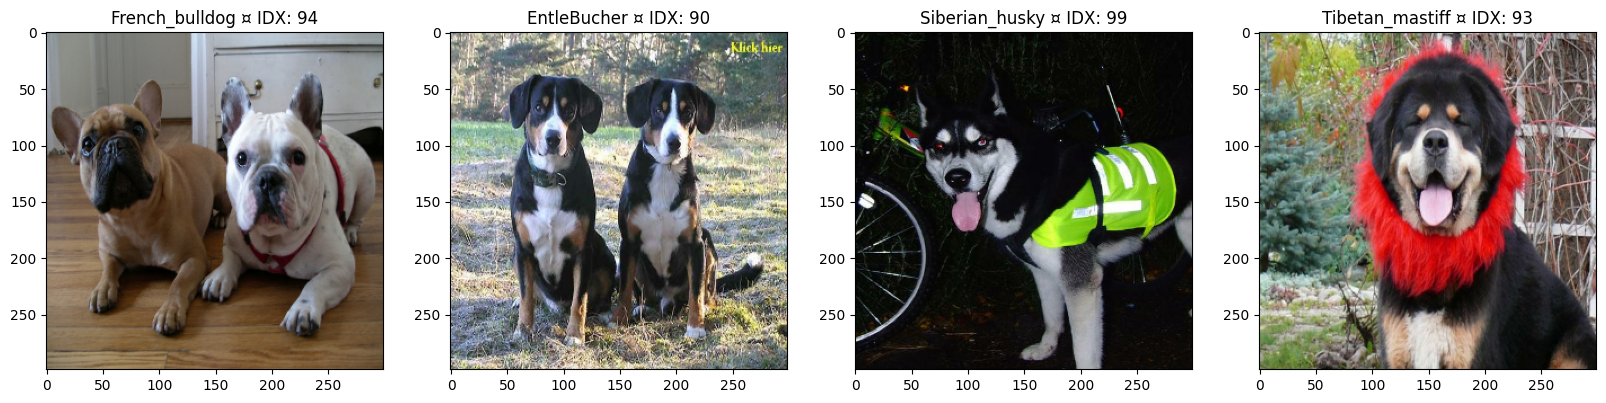

In [13]:
batch_299 = data_iterator_299.next()
batch_224 = data_iterator_224.next()

choosen_batch = batch_299

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(choosen_batch [0][:4]):
    ax[idx].imshow(img.astype(int))
    one_index = np.where(choosen_batch [1][idx] == 1)[0][0]  # Find the index of the first occurrence of 1
    ax[idx].title.set_text(breed_names[one_index] + " ¤ IDX: " + str(one_index) )


In [14]:
data_299 = data_299.map(lambda x,y: (x/255, y))
data_224 = data_224.map(lambda x,y: (x/255, y))

scaled_iterator_299 = data_299.as_numpy_iterator()
scaled_iterator_224 = data_224.as_numpy_iterator()



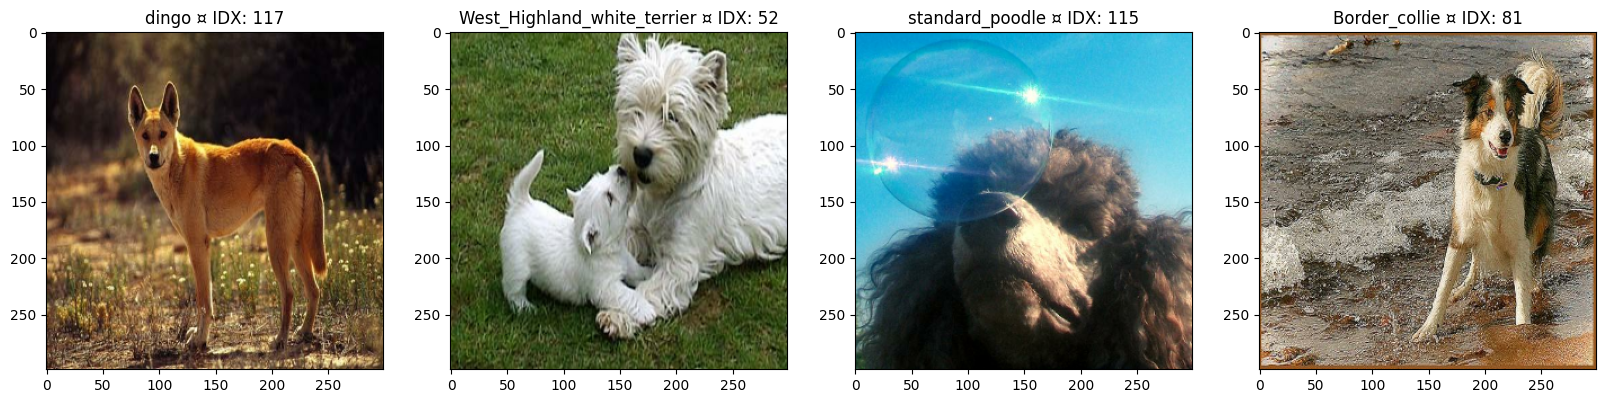

In [15]:
sBatch_299 = scaled_iterator_299.next()
sBatch_224 = scaled_iterator_224.next()

choosen_sBatch = sBatch_299

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(choosen_sBatch[0][:4]):
    ax[idx].imshow(img)
    one_index = np.where(choosen_sBatch[1][idx] == 1)[0][0]  # Find the index of the first occurrence of 1
    ax[idx].title.set_text(breed_names[one_index] + " ¤ IDX: " + str(one_index) )


In [16]:
train_size = int(len(data_224)*.7)
val_size = int(len(data_224)*.2) +1
test_size = int(len(data_224)*.1) +1

train_224 = data_224.take(train_size)
val_224 = data_224.skip(train_size).take(val_size)
test_224 = data_224.skip(train_size+val_size).take(test_size)

train_299 = data_299.take(train_size)
val_299 = data_299.skip(train_size).take(val_size)
test_299 = data_299.skip(train_size+val_size).take(test_size)



# RAW MODELISATIONS

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AveragePooling2D
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.applications import VGG16 , InceptionV3, Xception, DenseNet121, ResNet50
from tensorflow.keras.models import Model


<ipython-input-17-27e1b0a8677e>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


# Handcrafted CNN Model

## RandomGridSearch method on an inspired CNN architechture "Alex"

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D

def build_model(hp):
  model = Sequential()

  # First convolutional layer
  model.add(Conv2D(
      filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
      kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
      activation='relu',
      strides=(4, 4),
      input_shape=(299, 299, 3)
  ))
  model.add(MaxPooling2D((3, 3), strides=(2, 2)))

  # Second convolutional layer
  model.add(Conv2D(
      filters=hp.Int('conv_2_filter', min_value=16, max_value=64, step=16),
      kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
      activation='relu'
  ))
  model.add(MaxPooling2D((3, 3), strides=(2, 2)))

  # Three additional convolutional layers
  model.add(Conv2D(
      filters=hp.Int('conv_3_filter', min_value=64, max_value=256, step=64),
      kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
      activation='relu'
  ))
  model.add(Conv2D(
      filters=hp.Int('conv_4_filter', min_value=64, max_value=256, step=64),
      kernel_size=hp.Choice('conv_4_kernel', values=[3, 5]),
      activation='relu'
  ))
  model.add(Conv2D(
      filters=hp.Int('conv_5_filter', min_value=64, max_value=256, step=64),
      kernel_size=hp.Choice('conv_5_kernel', values=[3, 5]),
      activation='relu'
  ))
  model.add(MaxPooling2D((3, 3), strides=(2, 2)))

  # Flatten the output and add fully connected layers
  model.add(Flatten())
  model.add(Dense(
      units=hp.Int('dense_1_units', min_value=1024, max_value=4096, step=1024),
      activation='relu'
  ))
  model.add(Dense(
      units=hp.Int('dense_2_units', min_value=1024, max_value=4096, step=1024),
      activation='relu'
  ))


  # Output layer for multi-class classification
  model.add(Dense(120, activation='softmax'))

  # Compile the model
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  return model


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=20,directory='output',project_name="Mnist Fashion")


Reloading Tuner from output/Mnist Fashion/tuner0.json


In [ ]:
tuner_search.search(train_299, validation_data=val_299, epochs=1)


Trial 20 Complete [00h 03m 25s]
val_accuracy: 0.010174418799579144

Best val_accuracy So Far: 0.010658915154635906
Total elapsed time: 00h 57m 57s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 96)        7296      
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 36, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        76832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 256)       73984     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       2

In [ ]:
model.fit(train_299, epochs=10, validation_data=val_299)

Epoch 1/10
450/450 [==============================] - 151s 333ms/step - loss: 4.7800 - accuracy: 0.0133 - val_loss: 4.7832 - val_accuracy: 0.0102
Epoch 2/10
450/450 [==============================] - 124s 275ms/step - loss: 4.7798 - accuracy: 0.0129 - val_loss: 4.7833 - val_accuracy: 0.0109
Epoch 3/10
450/450 [==============================] - 127s 280ms/step - loss: 4.7800 - accuracy: 0.0131 - val_loss: 4.7831 - val_accuracy: 0.0107
Epoch 4/10
450/450 [==============================] - 127s 281ms/step - loss: 4.7795 - accuracy: 0.0131 - val_loss: 4.7838 - val_accuracy: 0.0102
Epoch 5/10
450/450 [==============================] - 147s 324ms/step - loss: 4.7795 - accuracy: 0.0133 - val_loss: 4.7841 - val_accuracy: 0.0099
Epoch 6/10
450/450 [==============================] - 130s 287ms/step - loss: 4.7796 - accuracy: 0.0132 - val_loss: 4.7842 - val_accuracy: 0.0092
Epoch 7/10
450/450 [==============================] - 146s 321ms/step - loss: 4.7795 - accuracy: 0.0132 - val_loss: 4.7840 -

In [ ]:
test_loss, test_accuracy = model.evaluate(test_299)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 63s 125ms/step - loss: 4.7829 - accuracy: 0.0097
Test Loss: 4.782929420471191, Test Accuracy: 0.00974658876657486


## Cloning a pre-trained state of the art architechture model "Xception" but without any weights

In [ ]:
# Load pre-trained xceptionV3
base_model_xception = Xception(
    include_top=True,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

# Create a new model by excluding the last layer
new_model_xception = Model(inputs=base_model_xception.input, outputs=base_model_xception.layers[-2].output)

for layer in new_model_xception.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_xception.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_xception = keras.models.Model(inputs=new_model_xception.input, outputs=predictions)

# Get the architecture of the original model
model_config = model_xception.get_config()

# Create a new model with the same architecture
new_model = keras.models.Model.from_config(model_config)

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10 # You can increase this as needed
hist = new_model.fit(train_299, epochs=num_epochs, validation_data=val_299)

91884032/91884032 [==============================] - 0s 0us/step
Epoch 1/10
450/450 [==============================] - 567s 1s/step - loss: 4.7415 - accuracy: 0.0184 - val_loss: 4.7210 - val_accuracy: 0.0199
Epoch 2/10
450/450 [==============================] - 530s 1s/step - loss: 4.3662 - accuracy: 0.0389 - val_loss: 4.5884 - val_accuracy: 0.0359
Epoch 3/10
450/450 [==============================] - 525s 1s/step - loss: 4.0515 - accuracy: 0.0691 - val_loss: 5.0687 - val_accuracy: 0.0385
Epoch 4/10
450/450 [==============================] - 593s 1s/step - loss: 3.8389 - accuracy: 0.0919 - val_loss: 4.1324 - val_accuracy: 0.0775
Epoch 5/10
450/450 [==============================] - 532s 1s/step - loss: 3.5878 - accuracy: 0.1280 - val_loss: 3.8340 - val_accuracy: 0.1017
Epoch 6/10
450/450 [==============================] - 534s 1s/step - loss: 3.2723 - accuracy: 0.1810 - val_loss: 4.1376 - val_accuracy: 0.1034
Epoch 7/10
450/450 [==============================] - 532s 1s/step - loss: 2.

In [ ]:
test_loss, test_accuracy = new_model.evaluate(test_299)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 93s 464ms/step - loss: 6.3465 - accuracy: 0.1043
Test Loss: 6.346462249755859, Test Accuracy: 0.1042884960770607


# TRANSFER LEARNING CNN models

In [ ]:
# Function to print the last N layers of a model
def print_last_layers(model, n=10):
    print(f"Last {n} layers of the model:")
    for layer in model.layers[-n:]:
        print(layer.name)


# RESNET model

In [ ]:

# Create the model with include_top=True
model_include_top = keras.applications.ResNet50(
    include_top=True,
    weights='imagenet'
)

# Create the model with include_top=False
model_exclude_top = keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3)
)

# Print the last 10 layers for both models
print("Include Top = True")
print_last_layers(model_include_top, n=10)
print("\nInclude Top = False")
print_last_layers(model_exclude_top, n=10)


94765736/94765736 [==============================] - 1s 0us/step
Include Top = True
Last 10 layers of the model:
conv5_block3_1_relu
conv5_block3_2_conv
conv5_block3_2_bn
conv5_block3_2_relu
conv5_block3_3_conv
conv5_block3_3_bn
conv5_block3_add
conv5_block3_out
avg_pool
predictions

Include Top = False
Last 10 layers of the model:
conv5_block3_1_conv
conv5_block3_1_bn
conv5_block3_1_relu
conv5_block3_2_conv
conv5_block3_2_bn
conv5_block3_2_relu
conv5_block3_3_conv
conv5_block3_3_bn
conv5_block3_add
conv5_block3_out


In [ ]:

from tensorflow.keras.models import Model

logdir_resnet= '/content/drive/My Drive/logs/logs_resnet'


if not os.path.exists(logdir_resnet):
    # Create the directory if it doesn't exist
    os.makedirs(logdir_resnet)
else:
    # Delete the entire "logs_resnet" directory and its contents
    shutil.rmtree(logdir_resnet)


tensorboard_callback_resnet= tf.keras.callbacks.TensorBoard(log_dir=logdir_resnet)

# Load pre-trained ResNet-50
base_model_resnet = ResNet50(
    include_top=True,
    weights='imagenet'
)

# Create a new model by excluding the last layer
new_model_resnet = Model(inputs=base_model_resnet.input, outputs=base_model_resnet.layers[-2].output)

for layer in new_model_resnet.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_resnet.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_resnet = keras.models.Model(inputs=new_model_resnet.input, outputs=predictions)

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10 # You can increase this as needed
hist_resnet= model_resnet.fit(train_224, epochs=num_epochs, validation_data=val_224, callbacks=[tensorboard_callback_resnet])


Epoch 1/10
450/450 [==============================] - 333s 641ms/step - loss: 3.6128 - accuracy: 0.1574 - val_loss: 4.8030 - val_accuracy: 0.0918
Epoch 2/10
450/450 [==============================] - 302s 671ms/step - loss: 2.3581 - accuracy: 0.3580 - val_loss: 3.3846 - val_accuracy: 0.2129
Epoch 3/10
450/450 [==============================] - 286s 634ms/step - loss: 1.7500 - accuracy: 0.5007 - val_loss: 3.5078 - val_accuracy: 0.2129
Epoch 4/10
450/450 [==============================] - 295s 654ms/step - loss: 1.2690 - accuracy: 0.6145 - val_loss: 3.8783 - val_accuracy: 0.1817
Epoch 5/10
450/450 [==============================] - 327s 724ms/step - loss: 0.8854 - accuracy: 0.7288 - val_loss: 2.7465 - val_accuracy: 0.3508
Epoch 6/10
450/450 [==============================] - 293s 651ms/step - loss: 0.5697 - accuracy: 0.8251 - val_loss: 4.8137 - val_accuracy: 0.2013
Epoch 7/10
450/450 [==============================] - 337s 749ms/step - loss: 0.3856 - accuracy: 0.8807 - val_loss: 3.7714 -

In [ ]:
# model.save("/content/drive/My Drive/fine_tuned_resnet50.h5")

test_loss, test_accuracy = model_resnet.evaluate(test_224)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 63s 265ms/step - loss: 4.6883 - accuracy: 0.0229
Test Loss: 4.688250541687012, Test Accuracy: 0.02290448360145092


# VGG MODEL

In [ ]:

# Create the model with include_top=True
model_include_top = VGG16(
    include_top=True,
    weights='imagenet'
)

# Create the model with include_top=False
model_exclude_top = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3)
)

# Print the last 10 layers for both models
print("Include Top = True")
print_last_layers(model_include_top, n=10)
print("\nInclude Top = False")
print_last_layers(model_exclude_top, n=10)


Include Top = True
Last 10 layers of the model:
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions

Include Top = False
Last 10 layers of the model:
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
# Get the "fc1" and "fc2" layers
fc1_layer = model_include_top.get_layer('fc1')
fc2_layer = model_include_top.get_layer('fc2')

# Print details of the "fc1" layer
print("Details of 'fc1' layer:")
print(f"Layer Name: {fc1_layer.name}")
print(f"Number of Units: {fc1_layer.output_shape[-1]}")
print(f"Activation Function: {fc1_layer.get_config()['activation']}")
print("\n")

# Print details of the "fc2" layer
print("Details of 'fc2' layer:")
print(f"Layer Name: {fc2_layer.name}")
print(f"Number of Units: {fc2_layer.output_shape[-1]}")
print(f"Activation Function: {fc2_layer.get_config()['activation']}")

Details of 'fc1' layer:
Layer Name: fc1
Number of Units: 4096
Activation Function: relu


Details of 'fc2' layer:
Layer Name: fc2
Number of Units: 4096
Activation Function: relu


In [ ]:

from tensorflow.keras.models import Model

logdir_vgg= '/content/drive/My Drive/logs/logs_vgg'


if not os.path.exists(logdir_vgg):
    # Create the directory if it doesn't exist
    os.makedirs(logdir_vgg)
else:
    # Delete the entire "logs_vgg" directory and its contents
    shutil.rmtree(logdir_vgg)


tensorboard_callback_vgg= tf.keras.callbacks.TensorBoard(log_dir=logdir_vgg)

# Load pre-trained vgg-50
base_model_vgg = VGG16(
    include_top=True,
    weights='imagenet'
)

# Create a new model by excluding the last layer
new_model_vgg = Model(inputs=base_model_vgg.input, outputs=base_model_vgg.layers[-2].output)

for layer in new_model_vgg.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_vgg.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_vgg = keras.models.Model(inputs=new_model_vgg.input, outputs=predictions)

# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10 # You can increase this as needed
hist_vgg= model_vgg.fit(train_224, epochs=num_epochs, validation_data=val_224, callbacks=[tensorboard_callback_vgg])


553467096/553467096 [==============================] - 11s 0us/step
Epoch 1/10
450/450 [==============================] - 425s 906ms/step - loss: 5.0262 - accuracy: 0.0110 - val_loss: 4.7660 - val_accuracy: 0.0155
Epoch 2/10
450/450 [==============================] - 410s 911ms/step - loss: 4.7749 - accuracy: 0.0144 - val_loss: 4.7507 - val_accuracy: 0.0162
Epoch 3/10
450/450 [==============================] - 393s 873ms/step - loss: 4.7602 - accuracy: 0.0148 - val_loss: 4.6523 - val_accuracy: 0.0201
Epoch 4/10
450/450 [==============================] - 404s 896ms/step - loss: 4.6242 - accuracy: 0.0188 - val_loss: 4.5758 - val_accuracy: 0.0230
Epoch 5/10
450/450 [==============================] - 399s 886ms/step - loss: 4.5603 - accuracy: 0.0231 - val_loss: 4.5279 - val_accuracy: 0.0262
Epoch 6/10
450/450 [==============================] - 403s 894ms/step - loss: 4.5215 - accuracy: 0.0245 - val_loss: 4.5050 - val_accuracy: 0.0281
Epoch 7/10
450/450 [==============================] - 39

In [ ]:
# model.save("/content/drive/My Drive/fine_tuned_vgg.h5")

test_loss, test_accuracy = model_vgg.evaluate(test_224)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 66s 322ms/step - loss: 4.5816 - accuracy: 0.0716
Test Loss: 4.581608772277832, Test Accuracy: 0.07163742929697037


# DenseNet model

In [ ]:

# Create the model with include_top=True
model_include_top = DenseNet121(
    include_top=True,
    weights='imagenet'
)

# Create the model with include_top=False
model_exclude_top = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3)
)

# Print the last 10 layers for both models
print("Include Top = True")
print_last_layers(model_include_top, n=10)
print("\nInclude Top = False")
print_last_layers(model_exclude_top, n=10)


29084464/29084464 [==============================] - 0s 0us/step
Include Top = True
Last 10 layers of the model:
conv5_block16_0_relu
conv5_block16_1_conv
conv5_block16_1_bn
conv5_block16_1_relu
conv5_block16_2_conv
conv5_block16_concat
bn
relu
avg_pool
predictions

Include Top = False
Last 10 layers of the model:
conv5_block15_concat
conv5_block16_0_bn
conv5_block16_0_relu
conv5_block16_1_conv
conv5_block16_1_bn
conv5_block16_1_relu
conv5_block16_2_conv
conv5_block16_concat
bn
relu


In [ ]:

from tensorflow.keras.models import Model

logdir_densenet= '/content/drive/My Drive/logs/logs_densenet'


if not os.path.exists(logdir_densenet):
    # Create the directory if it doesn't exist
    os.makedirs(logdir_densenet)
else:
    # Delete the entire "logs_densenet" directory and its contents
    shutil.rmtree(logdir_densenet)


tensorboard_callback_densenet= tf.keras.callbacks.TensorBoard(log_dir=logdir_densenet)

# Load pre-trained densenet-50
base_model_densenet = DenseNet121(
    include_top=True,
    weights='imagenet'
)

# Create a new model by excluding the last layer
new_model_densenet = Model(inputs=base_model_densenet.input, outputs=base_model_densenet.layers[-2].output)

for layer in new_model_densenet.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_densenet.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_densenet = keras.models.Model(inputs=new_model_densenet.input, outputs=predictions)

# Compile the model
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10 # You can increase this as needed
hist_densenet= model_densenet.fit(train_224, epochs=num_epochs, validation_data=val_224, callbacks=[tensorboard_callback_densenet])


Epoch 1/10
450/450 [==============================] - 456s 821ms/step - loss: 2.6652 - accuracy: 0.3224 - val_loss: 3.6534 - val_accuracy: 0.2287
Epoch 2/10
450/450 [==============================] - 334s 742ms/step - loss: 1.5709 - accuracy: 0.5464 - val_loss: 2.2087 - val_accuracy: 0.4157
Epoch 3/10
450/450 [==============================] - 339s 751ms/step - loss: 1.2113 - accuracy: 0.6334 - val_loss: 2.1886 - val_accuracy: 0.4440
Epoch 4/10
450/450 [==============================] - 326s 724ms/step - loss: 0.9397 - accuracy: 0.7104 - val_loss: 2.4485 - val_accuracy: 0.4218
Epoch 5/10
450/450 [==============================] - 365s 809ms/step - loss: 0.7547 - accuracy: 0.7600 - val_loss: 1.9739 - val_accuracy: 0.4947
Epoch 6/10
450/450 [==============================] - 341s 757ms/step - loss: 0.6260 - accuracy: 0.7987 - val_loss: 2.8465 - val_accuracy: 0.3789
Epoch 7/10
450/450 [==============================] - 364s 809ms/step - loss: 0.4838 - accuracy: 0.8458 - val_loss: 1.8906 -

In [ ]:
# model.save("/content/drive/My Drive/fine_tuned_densenet.h5")

test_loss, test_accuracy = model_densenet.evaluate(test_224)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 65s 258ms/step - loss: 2.8040 - accuracy: 0.4230
Test Loss: 2.803990125656128, Test Accuracy: 0.4230019450187683


# INCEPTION model

In [ ]:

# Create the model with include_top=True
model_include_top = InceptionV3(
    include_top=True,
    weights='imagenet'
)

# Create the model with include_top=False
model_exclude_top = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3)
)

# Print the last 10 layers for both models
print("Include Top = True")
print_last_layers(model_include_top, n=10)
print("\nInclude Top = False")
print_last_layers(model_exclude_top, n=10)


87910968/87910968 [==============================] - 1s 0us/step
Include Top = True
Last 10 layers of the model:
activation_91
activation_92
batch_normalization_101
activation_85
mixed9_1
concatenate_1
activation_93
mixed10
avg_pool
predictions

Include Top = False
Last 10 layers of the model:
activation_181
activation_182
activation_185
activation_186
batch_normalization_195
activation_179
mixed9_1
concatenate_3
activation_187
mixed10


In [ ]:

from tensorflow.keras.models import Model

logdir_inception= '/content/drive/My Drive/logs/logs_inception'


if not os.path.exists(logdir_inception):
    # Create the directory if it doesn't exist
    os.makedirs(logdir_inception)
else:
    # Delete the entire "logs_inception" directory and its contents
    shutil.rmtree(logdir_inception)


tensorboard_callback_inception= tf.keras.callbacks.TensorBoard(log_dir=logdir_inception)

# Load pre-trained inception-50
base_model_inception = InceptionV3(
    include_top=True,
    weights='imagenet'
)

# Create a new model by excluding the last layer
new_model_inception = Model(inputs=base_model_inception.input, outputs=base_model_inception.layers[-2].output)

for layer in new_model_inception.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_inception.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_inception = keras.models.Model(inputs=new_model_inception.input, outputs=predictions)

# Compile the model
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10 # You can increase this as needed
hist_inception= model_inception.fit(train_299, epochs=num_epochs, validation_data=val_299, callbacks=[tensorboard_callback_inception])


Epoch 1/10
450/450 [==============================] - 301s 595ms/step - loss: 2.8704 - accuracy: 0.2729 - val_loss: 2.5098 - val_accuracy: 0.3457
Epoch 2/10
450/450 [==============================] - 263s 584ms/step - loss: 1.7576 - accuracy: 0.4919 - val_loss: 2.8329 - val_accuracy: 0.2997
Epoch 3/10
450/450 [==============================] - 275s 611ms/step - loss: 1.2987 - accuracy: 0.6066 - val_loss: 2.1288 - val_accuracy: 0.4351
Epoch 4/10
450/450 [==============================] - 261s 578ms/step - loss: 1.0116 - accuracy: 0.6819 - val_loss: 2.1660 - val_accuracy: 0.4549
Epoch 5/10
450/450 [==============================] - 272s 603ms/step - loss: 0.7839 - accuracy: 0.7477 - val_loss: 2.0221 - val_accuracy: 0.4855
Epoch 6/10
450/450 [==============================] - 269s 596ms/step - loss: 0.6522 - accuracy: 0.7849 - val_loss: 2.5564 - val_accuracy: 0.3939
Epoch 7/10
450/450 [==============================] - 274s 608ms/step - loss: 0.5115 - accuracy: 0.8342 - val_loss: 2.1195 -

In [ ]:
# model.save("/content/drive/My Drive/fine_tuned_inception.h5")

test_loss, test_accuracy = model_inception.evaluate(test_299)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 66s 168ms/step - loss: 2.0205 - accuracy: 0.5341
Test Loss: 2.020475149154663, Test Accuracy: 0.5341130495071411


# XCEPTION model

In [ ]:

# Create the model with include_top=True
model_include_top = Xception(
    include_top=True,
    weights='imagenet'
)

# Create the model with include_top=False
model_exclude_top = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3)
)

# Print the last 10 layers for both models
print("Include Top = True")
print_last_layers(model_include_top, n=10)
print("\nInclude Top = False")
print_last_layers(model_exclude_top, n=10)


83683744/83683744 [==============================] - 0s 0us/step
Include Top = True
Last 10 layers of the model:
batch_normalization_3
add_11
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
avg_pool
predictions

Include Top = False
Last 10 layers of the model:
conv2d_7
block13_pool
batch_normalization_7
add_23
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act


In [ ]:

from tensorflow.keras.models import Model

logdir_xception = '/content/drive/My Drive/logs/logs_xception'


if not os.path.exists(logdir_xception):
    # Create the directory if it doesn't exist
    os.makedirs(logdir_xception)
else:
    # Delete the entire "logs_xception" directory and its contents
    shutil.rmtree(logdir_xception)


tensorboard_callback_xception = tf.keras.callbacks.TensorBoard(log_dir=logdir_xception)

# Load pre-trained xceptionV3
base_model_xception = Xception(
    include_top=True,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

# Create a new model by excluding the last layer
new_model_xception = Model(inputs=base_model_xception.input, outputs=base_model_xception.layers[-2].output)

for layer in new_model_xception.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_xception.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_xception = keras.models.Model(inputs=new_model_xception.input, outputs=predictions)

# Compile the model
model_xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10 # You can increase this as needed
hist_xception = model_xception.fit(train_299, epochs=num_epochs, validation_data=val_299, callbacks=[tensorboard_callback_xception])


91884032/91884032 [==============================] - 1s 0us/step
Epoch 1/10
450/450 [==============================] - 577s 1s/step - loss: 1.6205 - accuracy: 0.5521 - val_loss: 2.0803 - val_accuracy: 0.4547
Epoch 2/10
450/450 [==============================] - 531s 1s/step - loss: 0.8338 - accuracy: 0.7397 - val_loss: 1.5137 - val_accuracy: 0.5833
Epoch 3/10
450/450 [==============================] - 526s 1s/step - loss: 0.5964 - accuracy: 0.8066 - val_loss: 1.5254 - val_accuracy: 0.6008
Epoch 4/10
450/450 [==============================] - 531s 1s/step - loss: 0.4626 - accuracy: 0.8504 - val_loss: 1.8088 - val_accuracy: 0.5739
Epoch 5/10
450/450 [==============================] - 531s 1s/step - loss: 0.3685 - accuracy: 0.8792 - val_loss: 1.4457 - val_accuracy: 0.6344
Epoch 6/10
450/450 [==============================] - 531s 1s/step - loss: 0.3004 - accuracy: 0.8996 - val_loss: 2.1415 - val_accuracy: 0.5618
Epoch 7/10
450/450 [==============================] - 525s 1s/step - loss: 0.

In [ ]:
# model.save("/content/drive/My Drive/fine_tuned_xception.h5")

test_loss, test_accuracy = model_xception.evaluate(test_299)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 85s 469ms/step - loss: 1.9437 - accuracy: 0.6233
Test Loss: 1.9436917304992676, Test Accuracy: 0.6232943534851074


# CHOSEN MODEL

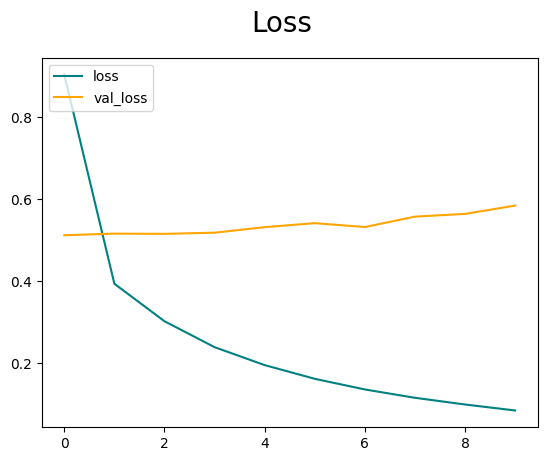

In [ ]:
hist = hist_xception

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

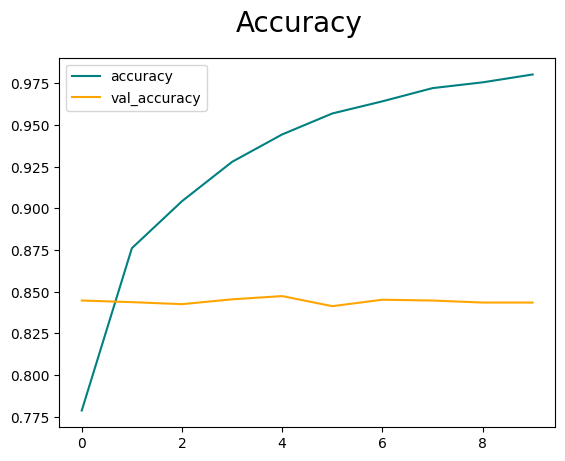

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Pre-processing

## Data augmentation

In [15]:
import tensorflow as tf

# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"), # MIRRORING
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2), # Random mimic zooms
    # tf.keras.layers.experimental.preprocessing.RandomHeight(0.1),  # Add height shift range
    # tf.keras.layers.experimental.preprocessing.RandomWidth(0.1),   # Add width shift range
    tf.keras.layers.experimental.preprocessing.RandomRotation(factor=1/12),  # Add rotation with a factor of 1/12  *360° (30 degrees)
])

# Set fill_mode to "reflective"
data_augmentation.layers[0].fill_mode = "reflect"

# Apply data augmentation to the training dataset (299x299x3)
augmented_train_299 = train_299.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:

from tensorflow.keras.models import Model

logdir_xception = '/content/drive/My Drive/logs/logs_xception'


if not os.path.exists(logdir_xception):
    # Create the directory if it doesn't exist
    os.makedirs(logdir_xception)
else:
    # Delete the entire "logs_xception" directory and its contents
    shutil.rmtree(logdir_xception)


tensorboard_callback_xception = tf.keras.callbacks.TensorBoard(log_dir=logdir_xception)

# Load pre-trained xceptionV3
base_model_xception_aug = Xception(
    include_top=True,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

# Create a new model by excluding the last layer
new_model_xception_aug = Model(inputs=base_model_xception_aug.input, outputs=base_model_xception_aug.layers[-2].output)

for layer in new_model_xception_aug.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_xception_aug.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_xception_aug = keras.models.Model(inputs=new_model_xception_aug.input, outputs=predictions)

# Compile the model
model_xception_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10 # You can increase this as needed
hist_xception_aug = model_xception_aug.fit(augmented_train_299, epochs=num_epochs, validation_data=val_299, callbacks=[tensorboard_callback_xception])


Epoch 1/10
450/450 [==============================] - 704s 1s/step - loss: 1.7785 - accuracy: 0.5117 - val_loss: 2.0325 - val_accuracy: 0.4576
Epoch 2/10
450/450 [==============================] - 669s 1s/step - loss: 1.1452 - accuracy: 0.6539 - val_loss: 1.7671 - val_accuracy: 0.5165
Epoch 3/10
450/450 [==============================] - 679s 2s/step - loss: 0.9318 - accuracy: 0.7121 - val_loss: 1.3942 - val_accuracy: 0.6141
Epoch 4/10
450/450 [==============================] - 664s 1s/step - loss: 0.8124 - accuracy: 0.7412 - val_loss: 1.4307 - val_accuracy: 0.5921
Epoch 5/10
450/450 [==============================] - 676s 1s/step - loss: 0.6643 - accuracy: 0.7865 - val_loss: 1.8102 - val_accuracy: 0.5487
Epoch 6/10
450/450 [==============================] - 679s 2s/step - loss: 0.6203 - accuracy: 0.8009 - val_loss: 1.5850 - val_accuracy: 0.5862
Epoch 7/10
450/450 [==============================] - 660s 1s/step - loss: 0.5320 - accuracy: 0.8270 - val_loss: 1.9002 - val_accuracy: 0.5591

In [ ]:

test_loss, test_accuracy = model_xception_aug.evaluate(test_299)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 94s 594ms/step - loss: 1.5502 - accuracy: 0.6345
Test Loss: 1.55015230178833, Test Accuracy: 0.6345029473304749


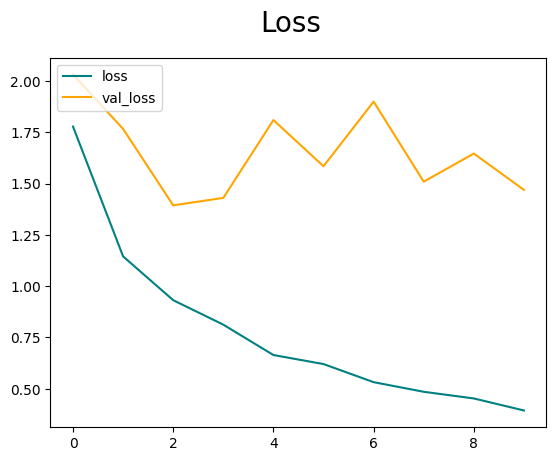

In [ ]:
fig = plt.figure()
plt.plot(hist_xception_aug.history['loss'], color='teal', label='loss')
plt.plot(hist_xception_aug.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

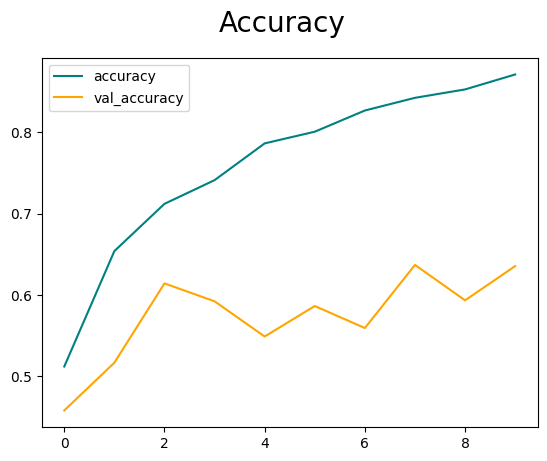

In [ ]:
fig = plt.figure()
plt.plot(hist_xception_aug.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_xception_aug.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Finding optimal "Learning Rate"

## Learning Rate finder/decay tuner function

In [16]:
def LR_finder(model, train_data, val_data, lr_lower, lr_higher, approach='macro', tuning=False, epoch_per_lr=1):

    LR = lr_higher

    result_tensor = {'LR_values': [],
                     'train_losses': [],
                     'train_accuracies': [],
                     'val_losses': [],
                     'val_accuracies': []}

    while LR >= lr_lower:

        if tuning == True:
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=LR),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            print("Learning  rate = ", LR)
            history = model.fit(train_data, epochs=epoch_per_lr, validation_data=val_data)

        elif tuning == False:
            # CLONING
            reseted_model = tf.keras.models.clone_model(model)

            # Copy the weights from the original model to the temporary model
            reseted_model.set_weights(model.get_weights())

            reseted_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LR),
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

            print("Learning  rate = ", LR)
            history = reseted_model.fit(train_data, epochs=epoch_per_lr, validation_data=val_data)

        else:
            print('You need to put tuning value either "True" or "False" otherwise it won"t work ')
            LR = lr_lower - 10

        train_loss = history.history['loss'][0]
        train_accuracy = history.history['accuracy'][0]
        val_loss = history.history['val_loss'][0]
        val_accuracy = history.history['val_accuracy'][0]

        result_tensor['LR_values'].append(LR)
        result_tensor['train_losses'].append(train_loss)
        result_tensor['train_accuracies'].append(train_accuracy)
        result_tensor['val_losses'].append(val_loss)
        result_tensor['val_accuracies'].append(val_accuracy)

        if approach == 'micro':
            LR = LR - lr_lower
        elif approach == 'macro':
            LR = LR / 10
        else:
            print('You need to put approach value either "micro" or "macro" otherwise it won"t work ')
            LR = lr_lower - 10


    print("It's done")

    return result_tensor


# Initializing Xception model

In [ ]:
# Load pre-trained xceptionV3
base_model_xception = Xception(
    include_top=True,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

# Create a new model by excluding the last layer
new_model_xception = Model(inputs=base_model_xception.input, outputs=base_model_xception.layers[-2].output)

for layer in new_model_xception.layers:
    layer.trainable = True

# Add custom top layers for classification
x = new_model_xception.output

predictions = keras.layers.Dense(120, activation='softmax')(x)

model_xception = keras.models.Model(inputs=new_model_xception.input, outputs=predictions)


91884032/91884032 [==============================] - 0s 0us/step


## Finding a range of the Learning Rate

In [ ]:
LR_finder (model=model_xception ,train_data=augmented_train_299 ,val_data=val_299 ,lr_lower =1e-7, lr_higher=1e-1, approach='macro' , tuning=False )

Learning  rate =  0.1
450/450 [==============================] - 653s 1s/step - loss: 4.9568 - accuracy: 0.0104 - val_loss: 5.1167 - val_accuracy: 0.0090
Learning  rate =  0.01
450/450 [==============================] - 661s 1s/step - loss: 4.8118 - accuracy: 0.0108 - val_loss: 4.8089 - val_accuracy: 0.0141
Learning  rate =  0.001
450/450 [==============================] - 665s 1s/step - loss: 1.7646 - accuracy: 0.5198 - val_loss: 1.7652 - val_accuracy: 0.5107
Learning  rate =  0.0001
450/450 [==============================] - 665s 1s/step - loss: 1.6962 - accuracy: 0.6801 - val_loss: 0.6082 - val_accuracy: 0.8367
Learning  rate =  1e-05
450/450 [==============================] - 743s 2s/step - loss: 4.2717 - accuracy: 0.2381 - val_loss: 3.4357 - val_accuracy: 0.5795
Learning  rate =  1.0000000000000002e-06
450/450 [==============================] - 747s 2s/step - loss: 4.7659 - accuracy: 0.0155 - val_loss: 4.7108 - val_accuracy: 0.0247
Learning  rate =  1.0000000000000002e-07
450/450 

{'LR_values': [0.1,
  0.01,
  0.001,
  0.0001,
  1e-05,
  1.0000000000000002e-06,
  1.0000000000000002e-07],
 'train_losses': [4.956753253936768,
  4.8118085861206055,
  1.7645694017410278,
  1.6962356567382812,
  4.271691799163818,
  4.76589822769165,
  4.807529926300049],
 'train_accuracies': [0.010416666977107525,
  0.01076388917863369,
  0.5197916626930237,
  0.6800694465637207,
  0.23805555701255798,
  0.015486110933125019,
  0.011041666381061077],
 'val_losses': [5.1167097091674805,
  4.808907985687256,
  1.7652441263198853,
  0.608227014541626,
  3.4356963634490967,
  4.710773468017578,
  4.806283473968506],
 'val_accuracies': [0.008963177911937237,
  0.014050387777388096,
  0.5106589198112488,
  0.8367248177528381,
  0.5794573426246643,
  0.024709302932024002,
  0.011385658755898476]}

In [ ]:
LR_finder (model=model_xception ,train_data=augmented_train_299 ,val_data=val_299 ,lr_lower =1e-4, lr_higher=1e-3, approach='micro' , tuning=False )

Learning  rate =  0.001
450/450 [==============================] - 709s 1s/step - loss: 1.7788 - accuracy: 0.5156 - val_loss: 1.7386 - val_accuracy: 0.5128
Learning  rate =  0.0009
450/450 [==============================] - 706s 2s/step - loss: 1.6908 - accuracy: 0.5349 - val_loss: 1.6862 - val_accuracy: 0.5286
Learning  rate =  0.0007999999999999999
450/450 [==============================] - 692s 1s/step - loss: 1.6112 - accuracy: 0.5561 - val_loss: 1.5648 - val_accuracy: 0.5695
Learning  rate =  0.0006999999999999999
450/450 [==============================] - 756s 2s/step - loss: 1.5158 - accuracy: 0.5831 - val_loss: 1.5610 - val_accuracy: 0.5586
Learning  rate =  0.0005999999999999998
450/450 [==============================] - 704s 2s/step - loss: 1.4376 - accuracy: 0.6040 - val_loss: 1.3108 - val_accuracy: 0.6151
Learning  rate =  0.0004999999999999998
450/450 [==============================] - 696s 1s/step - loss: 1.3595 - accuracy: 0.6359 - val_loss: 1.1132 - val_accuracy: 0.6650

{'LR_values': [0.001,
  0.0009,
  0.0007999999999999999,
  0.0006999999999999999,
  0.0005999999999999998,
  0.0004999999999999998,
  0.0003999999999999998,
  0.0002999999999999998,
  0.00019999999999999982],
 'train_losses': [1.7788316011428833,
  1.6908104419708252,
  1.6112135648727417,
  1.5158424377441406,
  1.4375823736190796,
  1.3594691753387451,
  1.293757438659668,
  1.2739288806915283,
  1.323217749595642],
 'train_accuracies': [0.5155555605888367,
  0.5349305272102356,
  0.5561110973358154,
  0.5831249952316284,
  0.6040277481079102,
  0.6359027624130249,
  0.6627777814865112,
  0.6829861402511597,
  0.6994444727897644],
 'val_losses': [1.7385975122451782,
  1.6862058639526367,
  1.5647802352905273,
  1.5609798431396484,
  1.3107892274856567,
  1.113236904144287,
  0.9247128367424011,
  0.9521205425262451,
  0.649298906326294],
 'val_accuracies': [0.512839138507843,
  0.5285852551460266,
  0.5695251822471619,
  0.5586240291595459,
  0.6150678396224976,
  0.6649709343910217,

## Iterating by decay on the chosen learning rate range "LR=3e-4 , then decaying by decimal until plateau"

In [ ]:
history_1 = LR_finder (model=model_xception ,train_data=augmented_train_299 ,val_data=val_299 ,lr_lower =1e-4, lr_higher=3e-4, approach='micro' , tuning=True )

Learning  rate =  0.0003
450/450 [==============================] - 747s 2s/step - loss: 1.2772 - accuracy: 0.6805 - val_loss: 0.7959 - val_accuracy: 0.7529
Learning  rate =  0.00019999999999999998
450/450 [==============================] - 714s 2s/step - loss: 0.4710 - accuracy: 0.8500 - val_loss: 0.6510 - val_accuracy: 0.7965
It's done


In [ ]:
history_2 = LR_finder (model=model_xception ,train_data=augmented_train_299 ,val_data=val_299 ,lr_lower =1e-5, lr_higher=1e-4, approach='micro' , tuning=True )

Learning  rate =  0.0001
450/450 [==============================] - 715s 2s/step - loss: 0.2441 - accuracy: 0.9224 - val_loss: 0.5195 - val_accuracy: 0.8324
Learning  rate =  9e-05
450/450 [==============================] - 705s 2s/step - loss: 0.1620 - accuracy: 0.9533 - val_loss: 0.5648 - val_accuracy: 0.8304
Learning  rate =  8e-05
450/450 [==============================] - 698s 1s/step - loss: 0.1222 - accuracy: 0.9636 - val_loss: 0.5824 - val_accuracy: 0.8268
Learning  rate =  7.000000000000001e-05
450/450 [==============================] - 716s 2s/step - loss: 0.0903 - accuracy: 0.9742 - val_loss: 0.5209 - val_accuracy: 0.8447
Learning  rate =  6.000000000000001e-05
450/450 [==============================] - 717s 2s/step - loss: 0.0653 - accuracy: 0.9832 - val_loss: 0.5249 - val_accuracy: 0.8508
Learning  rate =  5.000000000000001e-05
450/450 [==============================] - 711s 2s/step - loss: 0.0514 - accuracy: 0.9869 - val_loss: 0.5153 - val_accuracy: 0.8568
Learning  rate 

In [18]:
history_3 = LR_finder (model=model_xception ,train_data=augmented_train_299 ,val_data=val_299 ,lr_lower =1e-6, lr_higher=1e-5, approach='micro' , tuning=True )

Learning  rate =  1e-05
450/450 [==============================] - 738s 2s/step - loss: 0.0163 - accuracy: 0.9962 - val_loss: 0.4921 - val_accuracy: 0.8709
Learning  rate =  9e-06
450/450 [==============================] - 725s 2s/step - loss: 0.0147 - accuracy: 0.9967 - val_loss: 0.5123 - val_accuracy: 0.8685
Learning  rate =  8e-06
450/450 [==============================] - 718s 2s/step - loss: 0.0142 - accuracy: 0.9971 - val_loss: 0.5183 - val_accuracy: 0.8689
Learning  rate =  7e-06
450/450 [==============================] - 737s 2s/step - loss: 0.0135 - accuracy: 0.9966 - val_loss: 0.5133 - val_accuracy: 0.8685
Learning  rate =  6e-06
450/450 [==============================] - 781s 2s/step - loss: 0.0124 - accuracy: 0.9974 - val_loss: 0.5245 - val_accuracy: 0.8658
Learning  rate =  5e-06
450/450 [==============================] - 728s 2s/step - loss: 0.0124 - accuracy: 0.9975 - val_loss: 0.5112 - val_accuracy: 0.8694
Learning  rate =  4.000000000000001e-06
450/450 [===============

# Testing

In [20]:
test_loss, test_accuracy = model_xception.evaluate(test_299)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

65/65 [==============================] - 110s 583ms/step - loss: 0.5531 - accuracy: 0.8631
Test Loss: 0.5531078577041626, Test Accuracy: 0.8630604147911072


## Graph vizualisation

In [ ]:
historyT = {key: np.concatenate([history_1[key], history_2[key]]) for key in history_1.keys()}
history = {key: np.concatenate([historyT[key], history_3[key]]) for key in historyT.keys()}


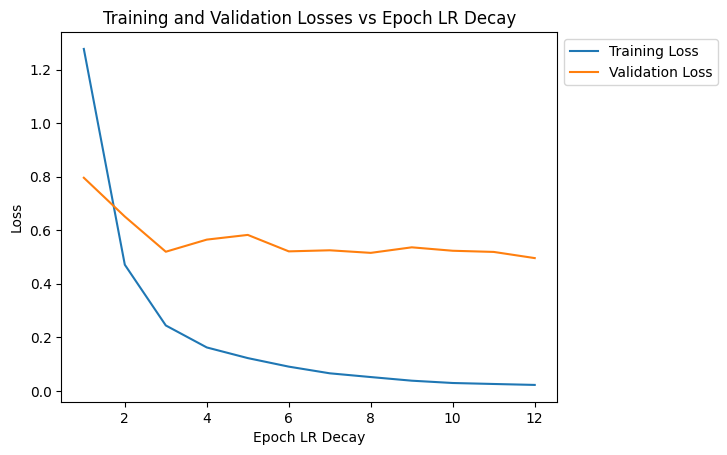

In [ ]:

# Plotting
plt.plot(range(1, len(history['train_losses']) + 1), history['train_losses'], label='Training Loss')
plt.plot(range(1, len(history['val_losses']) + 1), history['val_losses'], label='Validation Loss')
plt.xlabel('Epoch LR Decay')
plt.ylabel('Loss')
plt.title('Training and Validation Losses vs Epoch LR Decay')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


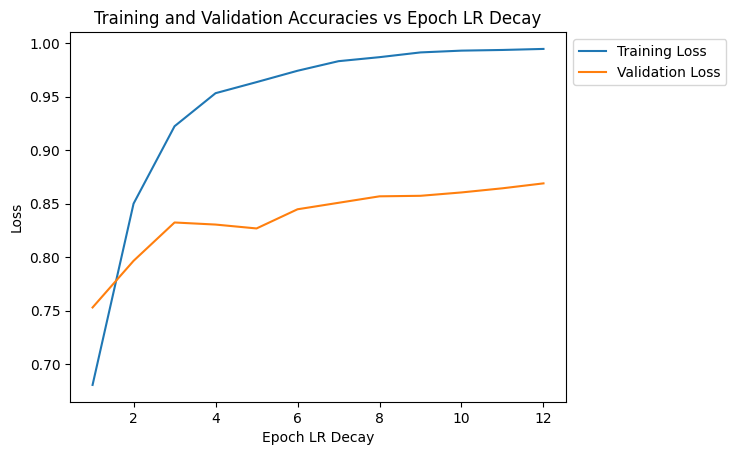

In [ ]:
# Plotting
plt.plot(range(1, len(history['train_accuracies']) + 1), history['train_accuracies'], label='Training Loss')
plt.plot(range(1, len(history['val_accuracies']) + 1), history['val_accuracies'], label='Validation Loss')
plt.xlabel('Epoch LR Decay')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracies vs Epoch LR Decay')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Final model

In [ ]:
# # Saving final  model , safety put  in comment to not overlap,delete it to use it.
# model_xception.save('/content/drive/My Drive/xception_86acc.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
from tensorflow.keras.models import load_model
from google.colab import drive

drive.mount('/content/drive')

# Provide the path to your saved model
final_model = load_model('/content/drive/My Drive/xception_86acc.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
val_iterator = val_299.as_numpy_iterator()
test_iterator = test_299.as_numpy_iterator()

Real race : Sealyham_terrier IDX : 39


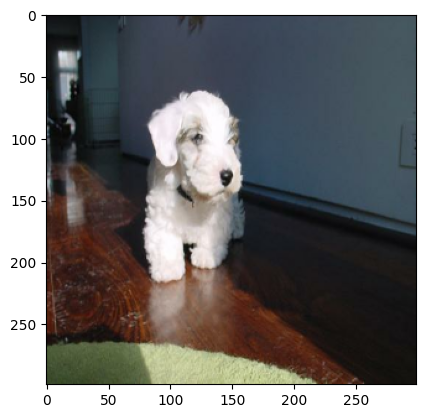

1/1 [==============================] - 0s 319ms/step
Index of maximum value: 39
Probability : 99.51002 %
Predicted race is :  Sealyham_terrier


In [39]:
batch_val = val_iterator.next()
batch_test = test_iterator.next()

chosen_batch =  batch_test  # choose validation batchs or test,as you  which.

index = 10
raw_image = chosen_batch[0][index]

# # Divide image_input by 255  if needed
# image_input_normalized = raw_image / 255.0

one_index = np.where(chosen_batch[1][index] == 1)[0][0]

# Display the image_input
plt.imshow(raw_image)
print("Real race : " + breed_names[one_index] + " IDX : " + str(one_index))
plt.show()

image_input = raw_image.reshape((1, 299, 299, 3))  # Add a batch dimension

# PREDICTING !
predictions = final_model.predict(image_input)

# Find the index of the maximum value
max_index = np.argmax(predictions)

# Get the maximum value
max_value = predictions[0, max_index]  # Assuming predictions is a 2D array

# Print the index and value
print("Index of maximum value:", max_index)
print("Probability :", round(max_value*100  , 5) , "%")
print("Predicted race is : " , breed_names[max_index])


1/1 [==============================] - 0s 30ms/step
Index of maximum value: 63
Probability : 99.59847 %
Predicted race is :  Gordon_setter


# Final model